# Ejercicio Arboles de decision clasificacion de flores

clasificacion segun datos de petalo y sepalo

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

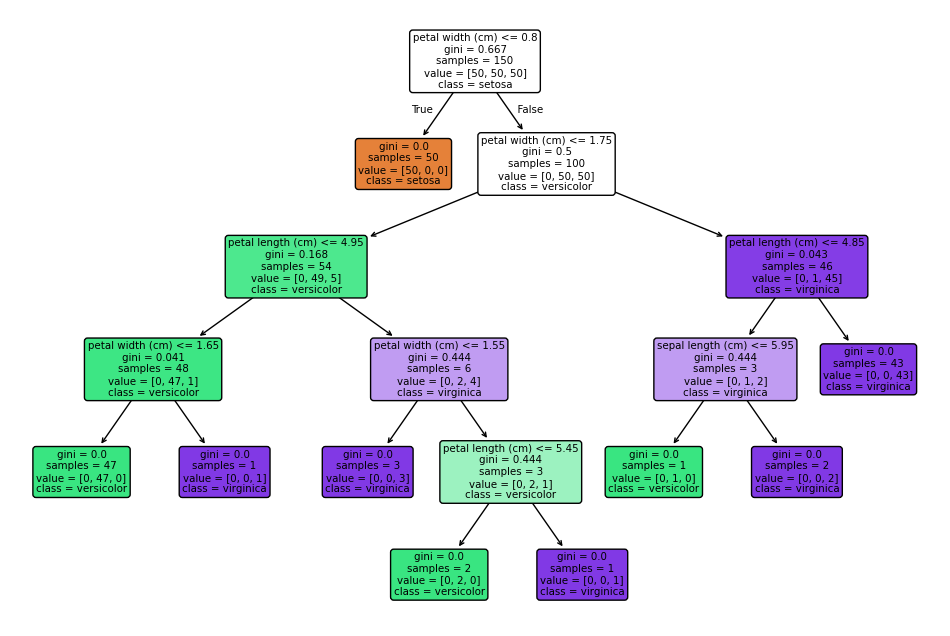

Tipo de flor:  ['virginica']
Introduce las dimensiones (longitud sépalo, anchura sépalo, longitud pétalo, anchura pétalo) o 'salir' para terminar: 3, 0.2, 2, 0.5
Tipo de flor:  ['setosa']
Introduce las dimensiones (longitud sépalo, anchura sépalo, longitud pétalo, anchura pétalo) o 'salir' para terminar: salir
Programa terminado.


In [3]:
# Importar las librerías necesarias
from sklearn.datasets import load_iris
from sklearn import tree
import graphviz
from sklearn.tree import export_graphviz
from google.colab import files
import matplotlib.pyplot as plt

# Cargar la base de datos "Iris"
iris = load_iris()

# Crear el clasificador basado en Decision Tree
clf = tree.DecisionTreeClassifier()

# Ajustar el modelo
clf = clf.fit(iris.data, iris.target)

# Generar el gráfico del árbol de decisión
dot_data = export_graphviz(clf, out_file=None,
                         feature_names=iris.feature_names,
                         class_names=iris.target_names,
                         filled=True, rounded=True,
                         special_characters=True)

# Visualizar el gráfico en formato PDF
graph = graphviz.Source(dot_data)

# Guardar el gráfico como PDF
graph.render("iris_tree_decision")

# Descargar el archivo PDF, a mí se me descarga en la carpeta por defecto "Downloads" del usuario de Windows
files.download('iris_tree_decision.pdf')

# MOSTRAR POR PANTALLA:
plt.figure(figsize=(12,8))  # Ajustar el tamaño de la figura
tree.plot_tree(clf,
               feature_names=iris.feature_names,
               class_names=iris.target_names,
               filled=True,
               rounded=True)
plt.show()


# Predecir el resultado para unas dimensiones determinadas
# Longitud y anchura de sépalo: 7 y 3 cm
# Longitud y anchura de pétalo: 5 y 1 cm
pred1 = clf.predict([[7,3,5,1]])
print("Tipo de flor: ", iris.target_names[pred1])

# Bucle para solicitar entradas al usuario hasta que escriba "salir"
while True:
    # Solicitar las dimensiones al usuario
    user_input = input("Introduce las dimensiones (longitud sépalo, anchura sépalo, longitud pétalo, anchura pétalo) o 'salir' para terminar: ")

    if user_input.lower() == 'salir':
        print("Programa terminado.")
        break

    try: # estructura try-except sirve para intentar ejecutar un código y si no manejar los errores que pueda producir:
        # Convertir la entrada en una lista de 4 valores flotantes
        dimensiones = [float(x) for x in user_input.split(',')]

        if len(dimensiones) != 4:
            print("Por favor, introduce exactamente 4 valores separados por comas.")
            continue

        # Predecir el tipo de flor
        prediccion = clf.predict([dimensiones])
        print("Tipo de flor: ", iris.target_names[prediccion])

    except ValueError:
        print("Entrada inválida. Por favor, introduce 4 valores numéricos separados por comas o 'salir' para terminar.")